In [68]:
import numpy as np
from scipy.integrate import RK45 as RK

In [69]:
def geodesic(tau, y):
    """
    y[0] = t
    y[1] = dt
    y[2] = r
    y[3] = dr
    y[4] = phi
    y[5] = dphi
    y[6] = mass
    
    F[0] = dt
    F[1] = d^2t
    F[2] = dr
    F[3] = d^2r
    F[4] = dphi
    F[5] = d^2phi
    F[6] = mass change (0)
    """
    F = np.zeros_like(y, dtype=float)
    G = 1
    c = 1
    M = y[6]
    R = (2*G*M)/c**2
    F[0] = y[1]
    F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
    F[2] = y[3]
    F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/(2*(y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
    F[4] = y[5]
    F[5] = -(2/y[2])*y[3]*y[5]
    F[6] = 0
    
    return F

In [70]:
def initial_y(t,r,phi,m):
    y = np.zeros(shape = (7))
    G = 1
    c = 1
    R = (2*G*m)/c**2
    dphi = np.sqrt((G*m)/r)
    y[0] = t
    y[1] = np.sqrt((c**2+((r**2)*(dphi**2)))/(1-R/r))
    y[2] = r
    y[3] = 0
    y[4] = phi
    y[5] = dphi
    y[6] = m
    return y

y = initial_y(0,5,0,1)
geodesic(0, y)

array([ 3.16227766, -0.        ,  0.        ,  0.36      ,  0.4472136 ,
       -0.        ,  0.        ])

In [75]:
y = initial_y(0,5,0,1)
#print(y)
#y = (0,1.2041,1000,0,0,0.0004,100)
runga = RK(fun = geodesic, t0 = 0, y0 = y, t_bound = 10, max_step = 0.1, first_step = 0.1, atol = 1e-6, rtol = 1e-6)
y_values = []
t_values = []
num = 0
while(1>0):
    # get solution step state
    runga.step()
    y_values.append(runga.y)
    print(runga.y)
    t_values.append(runga.t)
    # break loop after modeling is finished
    num+=1
    print(num)
    if runga.status == 'finished':
        break
print(y_values)
print(len(y_values))
print(t_values)

[0.31620248 3.16151923 5.00179984 0.03599376 0.04471063 0.4468918
 1.        ]
1
[0.63225348 3.15925019 5.0071975  0.07195008 0.08935698 0.44592884
 1.        ]
2
[0.94800277 3.1554891  5.01618736 0.10783153 0.13387526 0.44433191
 1.        ]
3
[1.26330257 3.1502665  5.02876007 0.14360068 0.17820262 0.44211289
 1.        ]
4
[1.57800874 3.14362429 5.04490251 0.17922015 0.22227764 0.43928811
 1.        ]
5
[1.89198185 3.13561493 5.06459786 0.21465266 0.26604074 0.43587812
 1.        ]
6
[2.20508821 3.12630039 5.08782557 0.24986107 0.30943457 0.43190733
 1.        ]
7
[2.51720076 3.11575106 5.11456138 0.28480847 0.35240444 0.42740364
 1.        ]
8
[2.82819984 3.10404445 5.14477735 0.31945836 0.39489856 0.42239798
 1.        ]
9
[3.13797384 3.09126388 5.17844193 0.35377475 0.43686842 0.41692389
 1.        ]
10
[3.44641973 3.07749708 5.21552001 0.38772234 0.47826891 0.41101699
 1.        ]
11
[3.75344341 3.06283487 5.25597296 0.42126672 0.51905863 0.4047145
 1.        ]
12
[4.05895995 3.0

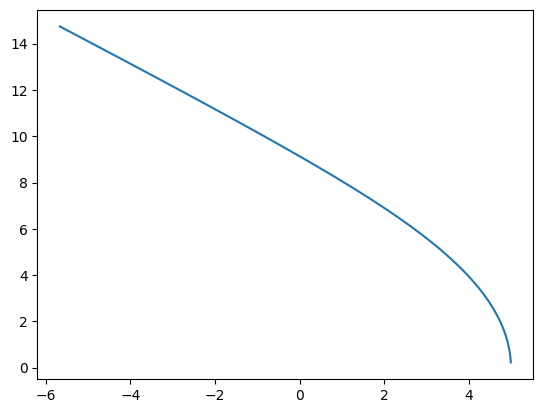

In [76]:
import matplotlib.pyplot as plt
y_values = np.array(y_values)
r = y_values[:,2]
phi = y_values[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)


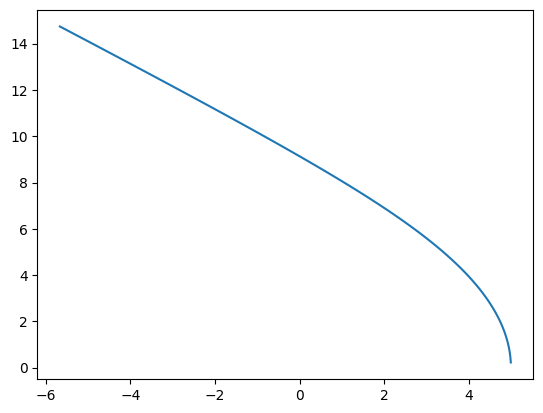

In [51]:
def rungaKutta(y,h):
    k1 = h * geodesic(0,y)
    k2 = h * geodesic(0,y + 0.5*k1)
    k3 = h * geodesic(0,y + 0.5*k2)
    k4 = h * geodesic(0,y + k3)    
    return (y + k1/6. + k2/3. + k3/3. + k4/6.)
y = initial_y(0,5,0,1)
y_vals = []
for i in range(100):
     y = rungaKutta(y, 0.1)
     y_vals.append(y)
y_vals = np.array(y_vals)
r = y_vals[:,2]
phi = y_vals[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
     